# Tarea5

### Rodolfo Arturo González Trillo

**Envío del PR inicial:** lunes 17 de octubre

**Aceptación del PR:** lunes 31 de octubre

In [45]:
using PyPlot
using TaylorSeries

**Ejercicio 1:**

Obtengan, para la familia de mapeos cuadrática $Q_c(x)$, el exponente de Lyapunov en términos de $c$.

- ¿Qué particularidad ocurre (en términos del exponente de Lyapunov) para los valores
de $c$ donde hay bifurcaciones?

- ¿Qué particularidad ocurre (en términos del exponente de Lyapunov) cuando tenemos *ciclos superestables*, es decir, cuando $x=0$ es parte de un ciclo periódico?

Utilizamos la función que ya conocemos.

In [1]:
function mapeo1D(F, x_0, c, n)
    @assert n ≥ 1
    
    x = x_0
    for i in 1:n
        x = F(x,c)
    end
    
    x

end

mapeo1D (generic function with 1 method)

El índice de Lyapunov está definido como:
\begin{equation}
\lambda(x_0) \equiv \lim_{n\to\infty} \lim_{\epsilon\to 0} 
\frac{1}{n}\log\Big| \frac{f^{n}(x_0+\epsilon)-f^{n}(x_0)}{\epsilon}\Big|.
\end{equation}

Definimos las funciones $Q_c^n(x)$

In [39]:
Qc(x,c) = x^2 + c

Qc (generic function with 1 method)

Definimos la función $\lambda(x_0)$:

In [40]:
function λ(F, x_0, c)
    
    n = 1000
    ϵ = 1/n
    
    Fn(x) = mapeo1D(F, x, c, n)
    
    (1/n)*log( abs( (Fn(x_0+ϵ)-Fn(x_0) )/ϵ))
end
    

λ (generic function with 1 method)

Realizamos el gráfico de _Fig 1._ para ver que ocurre:

In [42]:
#Intervalo de constantes.
cs = 0.25:-1/2^14:-2.0

#Valores de la función de Lyapunov alrededor de 0.0
λs = [λ(Qc, 0.0, c) for c in cs]

36865-element Array{Any,1}:
   -0.0183224 
   -0.0284428 
 -Inf         
 -Inf         
 -Inf         
 -Inf         
 -Inf         
 -Inf         
 -Inf         
 -Inf         
 -Inf         
 -Inf         
 -Inf         
    ⋮         
    0.00805091
    0.00704835
    0.0066709 
    0.00328655
    0.00691157
    0.00745733
    0.00685976
    0.00708439
    0.00775988
    0.0061212 
    0.00615716
    0.00770778

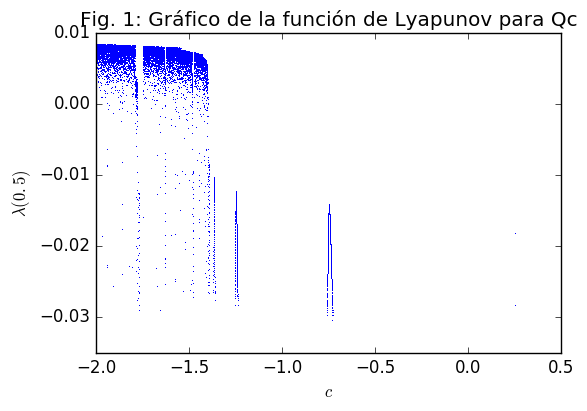

PyObject <matplotlib.text.Text object at 0x000000001BA5F7F0>

In [43]:
figure(figsize=(6,4))
plot(cs, λs, "b,")

plot()
xlabel(L"c")
ylabel(L"\lambda(0.5)")
title("Fig. 1: Gráfico de la función de Lyapunov para Qc")

De la tarea pasada, los primeros dos valores de bifurcación son -0.75 y -1.25. Aproximandonos al 0.75 observamos que ocurre un cambio súbito de pendiente.

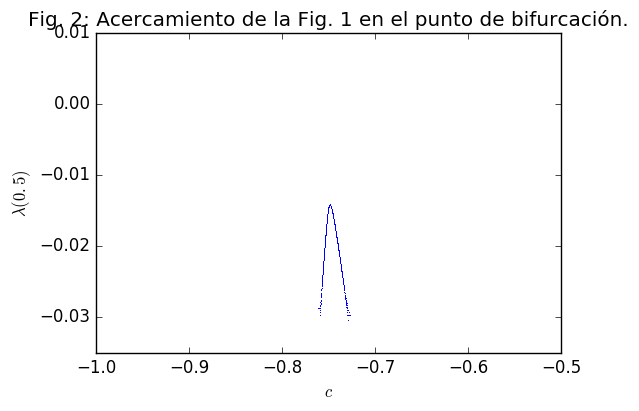

PyObject <matplotlib.text.Text object at 0x000000001B9B3E80>

In [44]:
figure(figsize=(6,4))
plot(cs, λs, "b,")

xlim(-1.0,-0.5)
plot()
xlabel(L"c")
ylabel(L"\lambda(0.5)")
title("Fig. 2: Acercamiento de la Fig. 1 en el punto de bifurcación.")

**Ejercicio 2:**

Rehacer los cálculos de los exponentes de Feigenbaum,
\begin{eqnarray*}
f_n &=& \frac{C_n-C_{n+1}}{C_{n+1}-C_{n+2}},\\
a_n &=& \frac{d_n}{d_{n+1}},
\end{eqnarray*}

usando los valores $C_n$ donde se tienen ciclos superestables de periodo $2^n$. (Este ejercicio es muy parecido a los ejercicios 1 y 3 de la `Tarea4`.)

Usamos las funciones de clase:

In [48]:
doc"""
    Qcⁿ(x, args)

Esta función define el n-enésimo iterado de $Qc(x,c)$,
donde el valor a iterar es `x` y el valor del parámetro
es `c`, donde `c = args[1]` y `n = args[2]`.
"""

function Qcⁿ(x, args)
    c, n = args[1], args[2]
    @assert n >= 0 && isa(n,Int)
    n <= 1 && return Qc(x,c)
    for it = 1:n
        x = Qc(x,c)
    end
    return x
end

Qcⁿ (generic function with 1 method)

In [176]:
function roots_newton(f, x0)
    t = Taylor1(1)
    for ind = 1:30
       fT = f(x0+t)
       x0 = x0 - fT.coeffs[1]/fT.coeffs[2]
    end
    x0
end

roots_newton (generic function with 1 method)

Calculamos los primeros 4 valores que ya conocemos.

In [214]:
N  = 3   #Número total de C's a calcular
Cs = [0.0]     #Arreglo de resultados.
for i in 1:N-1
    Qic = c -> Qcⁿ(0.0, (c, 2^i))       #Generación de la función.
    push!(Cs,roots_newton(Qic, -1.4))   #Cálculo de las raíces y almaceamiento de los resultados.
end

Cs

3-element Array{Float64,1}:
  0.0   
 -1.0   
 -1.3107

Ahora, buscamos la secuencia $f_n$ con:
$$f_n = \frac{C_n-C_{n+1}}{C_{n+1}-C_{n+2}}$$

In [215]:
f(C,n) = (C[n]-C[n+1])/(C[n+1]-C[n+2])

[f(Cs,i) for i in 1:N-2]

1-element Array{Any,1}:
 3.21851

Para tratar de adivinar la raíz, suponemos que la ecuación anterior es cierta con $f_n\approx constante \approx f_{n-3}$, y despejamos:

$$C_{n} \approx -\frac{C_{n-2}-C_{n-1}}{f_{n-3}}+C_{n-1}$$

Definimos la función $C_{pista}$, solamente para que nos de un valor cercano a la raíz búscada.

In [216]:
C_pista(C,f,n)=-(C[n-2]-C[n-1])/f+C[n-1]

C_pista (generic function with 2 methods)

In [217]:
M = 16
for i in N+1:M
    Qic = c -> Qcⁿ(0.0, (c, 2^i))       #Generación de la función.
    push!(Cs,roots_newton(Qic, C_pista(Cs,f(Cs,i-3),i)))   #Cálculo de las raíces y almaceamiento de los resultados.
end
Cs

16-element Array{Float64,1}:
  0.0    
 -1.0    
 -1.3107 
 -1.39695
 -1.4239 
 -1.43232
 -1.43495
 -1.43577
 -1.43603
 -1.43611
 -1.43613
 -1.43614
 -1.43614
 -1.43614
 -1.43614
 -1.43614

In [207]:
fs=[f(Cs,i) for i in 1:M-2]

14-element Array{Any,1}:
 3.21851
 4.38568
 4.60095
 4.65513
 4.66611
 4.66855
 4.66906
 4.66917
 4.6692 
 4.6692 
 4.6692 
 4.6692 
 4.66918
 4.66934

Todo el procedimiento anterior lo ingresamos en una función:

In [218]:
function secuencia_f_n(Fⁿ,x_0,M)
    N  = 3   
    fs = Float64[]     
    
    for i in 0:N-1
        Fic = c -> Fⁿ(x_0, (c, 2^i))       
        push!(fs,roots_newton(Fic, -1.4))   
    end
    
    for i in N+1:M
        Fic = c -> Fⁿ(x_0, (c, 2^i))       #Generación de la función.
        push!(fs,roots_newton(Fic, C_pista(fs,f(fs,i-3),i)))   #Cálculo de las raíces y almaceamiento de los resultados.
    end
    fs
    
end


secuencia_f_n (generic function with 1 method)

Ahora $d_n = \left| \ f^{n}(x_0+\epsilon)-f^{n}(x_0)\right| $

In [220]:
ϵ = 1e-7
ds=abs(secuencia_f_n(Qcⁿ, 0.0, 20).-secuencia_f_n(Qcⁿ, 1e-7, 20))

20-element Array{Float64,1}:
 1.0e-14    
 1.9984e-14 
 2.81997e-14
 5.17364e-14
 2.64233e-14
 2.19824e-14
 2.10942e-14
 2.08722e-14
 2.08722e-14
 2.08722e-14
 2.08722e-14
 2.08722e-14
 2.08722e-14
 2.08722e-14
 2.08722e-14
 2.08722e-14
 2.08722e-14
 2.08722e-14
 2.08722e-14
 2.08722e-14

In [224]:
as=[ds[i]/ds[i+1] for i in 1:length(ds)-1]

19-element Array{Any,1}:
 0.5004  
 0.708661
 0.545064
 1.95798 
 1.20202 
 1.04211 
 1.01064 
 1.0     
 1.0     
 1.0     
 1.0     
 1.0     
 1.0     
 1.0     
 1.0     
 1.0     
 1.0     
 1.0     
 1.0     

**Ejercicio 3:**

Comparar gráficamente los mapeos $Q_{c}(x)$ y $Q_{c^\prime}^2(x)$ para $c=1/4, 0, -3/4, -1, -2, -2.2$ y $c^\prime=-3/4,-1,-5/4,-1.3, -1.546\dots, -1.65$. 


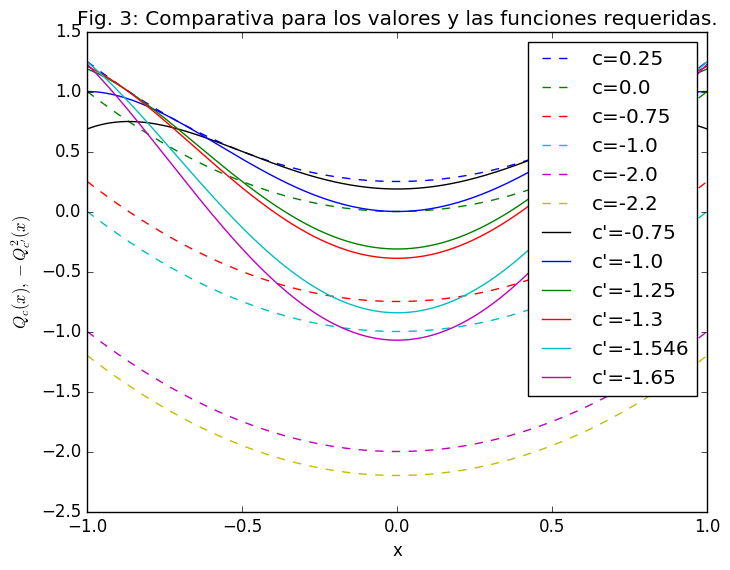

PyObject <matplotlib.text.Text object at 0x00000000209E9C88>

In [251]:
xs = -1.0:1/2^8:1.0

c  = [1/4,  0,-3/4,  -1,    -2, -2.2]
c´ = [-3/4,-1,-5/4,-1.3,-1.546,-1.65]

for ci in c
    plot(xs,[Qcⁿ(x, (ci, 1)) for x in xs],"--",label="c=$ci")
end

for ci in c´
    plot(xs,[-Qcⁿ(x, (ci, 2)) for x in xs],label="c'=$ci")
end
legend()
xlabel("x")
ylabel(L"Q_{c}(x) , -Q_{c^\prime}^2(x)")
title("Fig. 3: Comparativa para los valores y las funciones requeridas.")

Observamos en el gráfico que los valores de $-Q_{c^\prime}^2(x)$ son osculantes a la parábola  $Q_{c}(x)$con $c=0.25$

**Ejercicio 4:**

Estudiar la dinámica para $c=-2.2$

- ¿Cómo se caracteriza el valor al que tiende *casi* cualquier condición inicial en el
intervalo $I=[-p_+,p_+]$ (donde $p_+$ es el valor positivo tal que $Q_c(p_+)=p_+$), después de muchos iterados? (El intervalo $I$ es donde "toda la dinámica interesante ocurre".)

- Caractericen los subconjuntos de $I$ tales que, después de $n=1,2,3,\dots$ iterados de $Q_c(x)$, su intersección con $I$ es vacía.

- Caracterizen al complemento del conjunto de los casos anteriores, es decir, cuando los iterados de la condición inicial **no** llegan a donde *casi* cualquier condición inicial termina. ¿Cómo se conoce a este conjunto?

$Q_c = x^2 + c $

El intervalo $I$ es $\left[ \frac{1}{10} \left( 5-7\sqrt{5} \right),\frac{1}{10} \left( 5+7\sqrt{5} \right) \right]$

In [265]:
Qcⁿ(1, (-2.2, 1))

-1.2000000000000002

**Ejercicio 5:**

- Usando el análisis gráfico para un valor de $c$ *ligeramente* anterior al punto donde se observa la ventana de periodo 3 para la familia $Q_c(x)$, y uno en la ventana de periodo 3, concluyan el tipo de bifurcación que se observa.

- Comparen la dinámica para ambos valores de $c$ del inciso anterior. ¿Cómo es el exponente de Liapunov en cada caso?

- Encuentren el valor de $c$ donde se da el ciclo superestable de periodo 3. (Nuevamente, ayuden al método de Newton con una buena semilla inicial para $c$.) Demuestren que para este valor de $c$ el mapeo $Q_c^3(x)$ tiene *ocho* puntos fijos, donde dos de ellos son puntos fijos de $Q_c(x)$, y los otros 6 forman dos secuencias periódicas, de periodo 3 en $Q_c(x)$, una de ellas estable y la otra inestable.

(Los siguientes incisos usan el valor de $c$ encontrado en el inciso anterior.)

- Denotando al ciclo inestable de periodo 3 como $\alpha\mapsto \beta\mapsto\gamma$, con $\gamma<\beta<\alpha$, uno puede asociar a cada uno de estos valores un valor $\hat\alpha, \hat\beta, \hat\gamma$, tales que $Q_c^3(\hat\alpha)=\alpha$, $Q_c^3(\hat\beta)=\beta$, $Q_c^3(\hat\gamma)=\gamma$. ¿Qué podemos concluir de un punto que cae en cualquiera de los intervalos $[\alpha,\hat\alpha]$, $[\beta,\hat\beta]$ y $[\hat\gamma,\gamma]$, en términos de los iterados sucesivos?

- Definiendo los intervalos $I_0=[\hat\beta, \alpha]$, $I_1=[\gamma,\beta]$, mostrar que bajo la acción de $Q_c(x)$ se cumple: (i) $Q_c(I_0) \supset I_1$, y (ii) $Q_c(I_1) \supset I_0\cup I_1$. ¿Qué propiedad *importante* de $Q_c(x)$ se utiliza aquí?

(Los intervalos $I_0$ e $I_1$, y estas propiedades, son básicos en la demostración del teorema "periodo tres implica caos".)

In [254]:
function secuencia_f_n(Fⁿ,x_0,M)
    N  = 3   
    fs = Float64[]     
    
    for i in 1:N
        Fic = c -> Fⁿ(x_0, (c, i+1))       
        push!(fs,roots_newton(Fic, -1.4))   
    end
    
    for i in N+1:M-1
        Fic = c -> Fⁿ(x_0, (c, i))       #Generación de la función.
        push!(fs,roots_newton(Fic, C_pista(fs,f(fs,i-3),i)))   #Cálculo de las raíces y almaceamiento de los resultados.
    end
    fs
    
end

secuencia_f_n (generic function with 1 method)

In [255]:
secuencia_f_n(Qcⁿ, 0.0, 20)

19-element Array{Float64,1}:
  -1.0    
  -1.75488
  -1.3107 
  -1.3107 
   0.0    
 NaN      
 NaN      
 NaN      
 NaN      
 NaN      
 NaN      
 NaN      
 NaN      
 NaN      
 NaN      
 NaN      
 NaN      
 NaN      
 NaN      